In [1]:
import torch
import h5py
import numpy as np

### Preprocess the data

In [2]:
data = h5py.File('./MNISTdata.hdf5','r')


In [3]:
X,y = data['input'][...],data['output'][...]
def process_(y):
    a=[]
    for i in y:
        a.append(int(i[0]))
    return np.array(a)
y = process_(y)
# convert it to a more mangeable form

In [4]:
ut = torch.Tensor(y)
ut.shape
# checking if it is in manageable form

torch.Size([2000])

In [5]:
# splitting in 70:30
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print("Size of input training data is "+ str(len(X_train)))
print("Size of input training labels is "+ str(len(y_train)))
print("Size of input testing set is "+ str(len(X_test)))
print("Size of input test labels is "+ str(len(y_test)))


Size of input training data is 1400
Size of input training labels is 1400
Size of input testing set is 600
Size of input test labels is 600


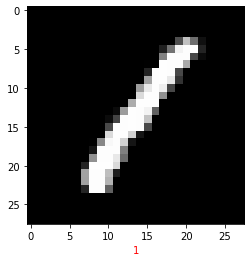

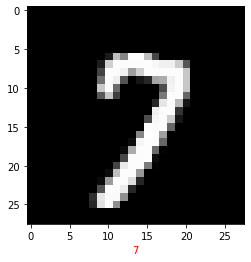

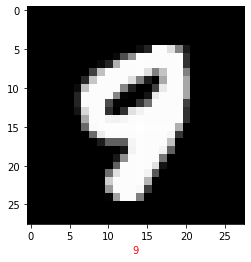

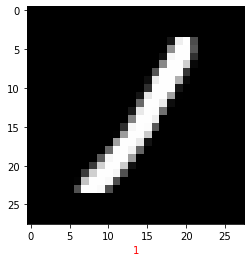

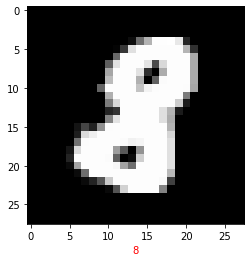

In [6]:
# show first 5 test images woth their labels
import numpy as np
import matplotlib.pyplot as plt
for i in range(5):
    label = ""+str(y_test[i])
    plt.imshow(X_test[i], interpolation='nearest',cmap = 'gray')
    plt.xlabel(label,color='red')
    plt.show()
    
    
    


In [7]:
# convert images from (28,28) to (784,) so that it can be fed to neural net
print("shape of train data before flattening" , X_train[0].shape)
print("shape of test data before flattening", X_test[0].shape)

def flatten(X):
    a = []
    for i in X:
        i = i.flatten()
        a.append(i)
    return np.array(a)
X_train = flatten(X_train)
X_test  = flatten(X_test)
print("shape of train data after flattening",(X_train[0].shape))
print("shape of test data after flattening",(X_test[0].shape))


shape of train data before flattening (28, 28, 1)
shape of test data before flattening (28, 28, 1)
shape of train data after flattening (784,)
shape of test data after flattening (784,)


In [8]:
# creating dataloaders
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
train_dataset = TensorDataset(torch.tensor(X_train),torch.tensor(y_train,dtype=torch.long))
test_dataset  = TensorDataset(torch.tensor(X_test),torch.tensor(y_test,dtype=torch.long))
train_dataloader = DataLoader(train_dataset,batch_size=64,shuffle=True)
test_dataloader = DataLoader(test_dataset,batch_size=64,shuffle=True)


### Importing Models

In [9]:
import model1
import model2
import model3
import model4

#### In general ma_b denotes a-th model with b-th configuration

In [10]:
# model1 with configuration-1
m1_1 = model1.Model(5*10**-2,10**-3,200)
m1_1.compute(train_dataloader,test_dataloader)
# compute does the training and stores information about training losses, test losses and their accuracies to plot graphs later on

epoch: 1/200,train_loss = 44.6946, test_loss = 18.1805 , train_acc = 28.57,test_acc = 39.17
epoch: 2/200,train_loss = 36.9659, test_loss = 17.0937 , train_acc = 40.79,test_acc = 37.17
epoch: 3/200,train_loss = 36.3171, test_loss = 18.1248 , train_acc = 40.79,test_acc = 37.83
epoch: 4/200,train_loss = 38.5167, test_loss = 16.2393 , train_acc = 35.21,test_acc = 40.83
epoch: 5/200,train_loss = 37.3901, test_loss = 17.7576 , train_acc = 37.43,test_acc = 24.00
epoch: 6/200,train_loss = 39.2023, test_loss = 17.3300 , train_acc = 32.50,test_acc = 30.50
epoch: 7/200,train_loss = 37.8788, test_loss = 17.5899 , train_acc = 34.86,test_acc = 40.33
epoch: 8/200,train_loss = 41.3986, test_loss = 19.3976 , train_acc = 30.93,test_acc = 27.83
epoch: 9/200,train_loss = 41.3297, test_loss = 17.4364 , train_acc = 30.29,test_acc = 35.50
epoch: 10/200,train_loss = 37.6433, test_loss = 17.0305 , train_acc = 36.43,test_acc = 32.67
epoch: 11/200,train_loss = 37.5778, test_loss = 16.1764 , train_acc = 35.21,tes

In [11]:
# test the model for accuracy on test data and print model configuration
m1_1.test(test_dataloader)
m1_1.print_model_congiurations()

accuracy=34.166666666666664
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 50]          39,250
           Sigmoid-2                   [-1, 50]               0
            Linear-3                   [-1, 10]             510
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.15
Estimated Total Size (MB): 0.16
----------------------------------------------------------------


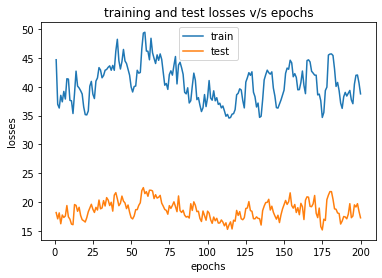

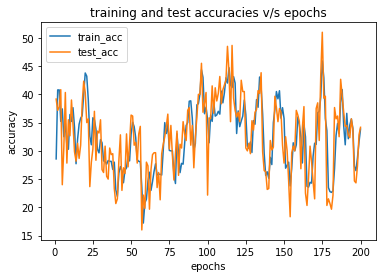

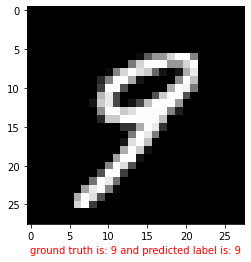

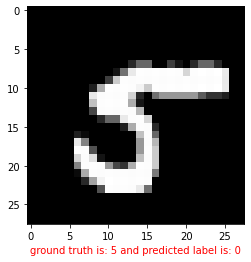

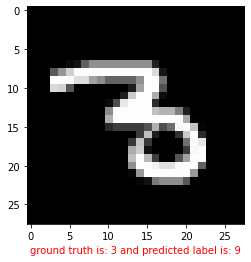

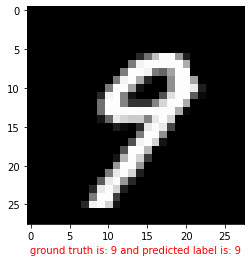

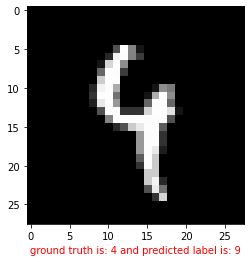

time taken:-  10.65382719039917  sec


In [12]:
# draws graphs for accuracy and losses
m1_1.draw_graphs()
# print first five predicions
m1_1.print_first_five_preds(test_dataloader)
print("time taken:- ",m1_1.time_took()," sec")
# high learning rate thus lot of fluctuations and the model is not able to learn properly bcoz of high lr

In [13]:
m1_2 = model1.Model(10**-3,10**-4,200)
m1_2.compute(train_dataloader,test_dataloader)


epoch: 1/200,train_loss = 45.7698, test_loss = 18.4404 , train_acc = 40.21,test_acc = 62.17
epoch: 2/200,train_loss = 37.9985, test_loss = 16.1264 , train_acc = 66.93,test_acc = 73.00
epoch: 3/200,train_loss = 33.2168, test_loss = 14.1369 , train_acc = 74.79,test_acc = 77.00
epoch: 4/200,train_loss = 28.7827, test_loss = 12.5006 , train_acc = 79.00,test_acc = 81.33
epoch: 5/200,train_loss = 25.7102, test_loss = 11.3652 , train_acc = 82.50,test_acc = 80.17
epoch: 6/200,train_loss = 22.9753, test_loss = 10.1729 , train_acc = 84.36,test_acc = 82.17
epoch: 7/200,train_loss = 20.2002, test_loss = 9.5679 , train_acc = 86.64,test_acc = 84.17
epoch: 8/200,train_loss = 18.0832, test_loss = 8.2943 , train_acc = 88.21,test_acc = 83.67
epoch: 9/200,train_loss = 16.6744, test_loss = 7.9187 , train_acc = 88.79,test_acc = 84.83
epoch: 10/200,train_loss = 15.2994, test_loss = 7.4917 , train_acc = 88.93,test_acc = 85.67
epoch: 11/200,train_loss = 13.9344, test_loss = 7.0223 , train_acc = 90.21,test_acc

In [14]:
m1_2.test(test_dataloader)
m1_2.print_model_congiurations()

accuracy=89.66666666666666
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 50]          39,250
           Sigmoid-2                   [-1, 50]               0
            Linear-3                   [-1, 10]             510
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.15
Estimated Total Size (MB): 0.16
----------------------------------------------------------------


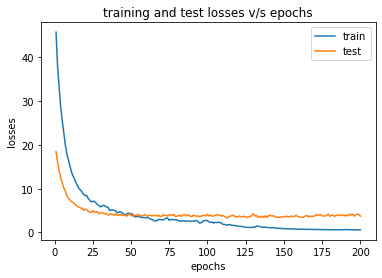

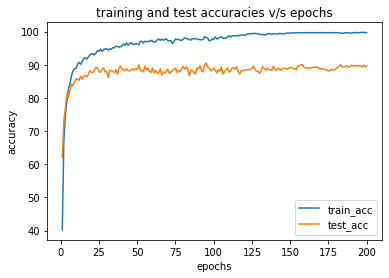

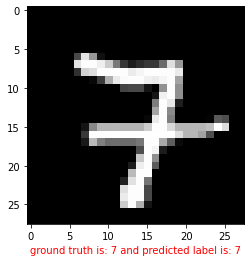

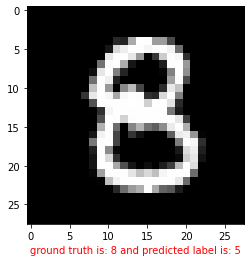

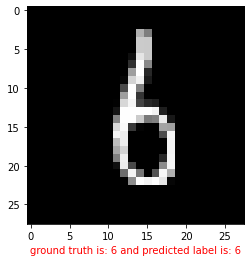

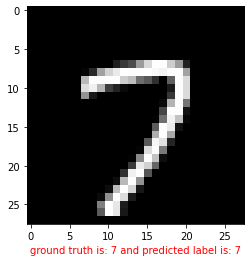

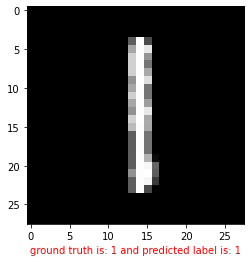

time taken:-  18.514334678649902  sec


In [15]:
m1_2.draw_graphs()
m1_2.print_first_five_preds(test_dataloader)
print("time taken:- ",m1_2.time_took()," sec")

In [16]:
m1_3 = model1.Model(10**-4,10**-5,300)
m1_3.compute(train_dataloader,test_dataloader)


epoch: 1/300,train_loss = 52.6489, test_loss = 23.1482 , train_acc = 9.43,test_acc = 9.67
epoch: 2/300,train_loss = 49.3562, test_loss = 22.0164 , train_acc = 11.93,test_acc = 13.83
epoch: 3/300,train_loss = 46.9880, test_loss = 21.0362 , train_acc = 15.36,test_acc = 17.50
epoch: 4/300,train_loss = 44.9327, test_loss = 20.3592 , train_acc = 21.43,test_acc = 23.33
epoch: 5/300,train_loss = 43.1648, test_loss = 19.6154 , train_acc = 32.36,test_acc = 37.17
epoch: 6/300,train_loss = 41.5739, test_loss = 18.9955 , train_acc = 47.43,test_acc = 49.00
epoch: 7/300,train_loss = 40.1670, test_loss = 18.5382 , train_acc = 57.07,test_acc = 54.00
epoch: 8/300,train_loss = 38.9582, test_loss = 17.9844 , train_acc = 63.00,test_acc = 59.83
epoch: 9/300,train_loss = 37.8797, test_loss = 17.6493 , train_acc = 67.07,test_acc = 64.00
epoch: 10/300,train_loss = 36.9114, test_loss = 17.1363 , train_acc = 70.14,test_acc = 67.17
epoch: 11/300,train_loss = 36.0074, test_loss = 16.8754 , train_acc = 72.71,test_

In [17]:
m1_3.test(test_dataloader)
m1_3.print_model_congiurations()

accuracy=86.83333333333333
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 50]          39,250
           Sigmoid-2                   [-1, 50]               0
            Linear-3                   [-1, 10]             510
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.15
Estimated Total Size (MB): 0.16
----------------------------------------------------------------


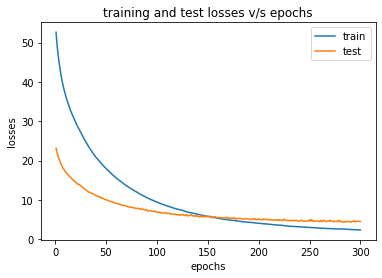

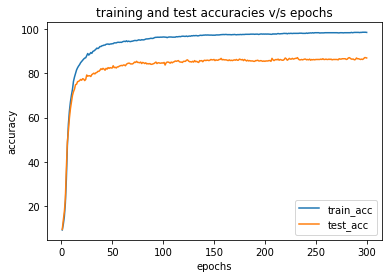

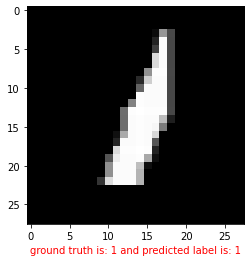

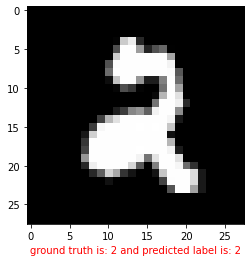

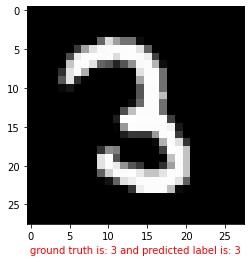

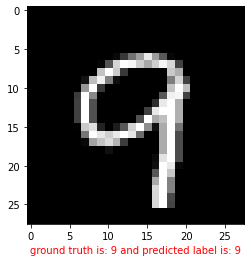

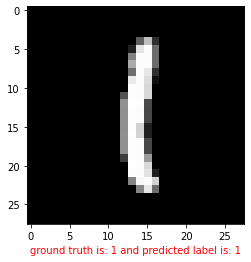

time taken:-  24.880910396575928  sec


In [18]:
m1_3.draw_graphs()
m1_3.print_first_five_preds(test_dataloader)
print("time taken:- ",m1_3.time_took()," sec")

In [19]:
m2_1 = model2.Model(5*10**-2,10**-3,300)
m2_1.compute(train_dataloader,test_dataloader)


epoch: 1/300,train_loss = 59.5862, test_loss = 24.0446 , train_acc = 9.57,test_acc = 10.83
epoch: 2/300,train_loss = 51.0874, test_loss = 22.5734 , train_acc = 12.36,test_acc = 18.00
epoch: 3/300,train_loss = 49.6038, test_loss = 21.0725 , train_acc = 16.36,test_acc = 31.33
epoch: 4/300,train_loss = 44.7884, test_loss = 18.8169 , train_acc = 26.29,test_acc = 27.67
epoch: 5/300,train_loss = 43.3500, test_loss = 19.9325 , train_acc = 28.14,test_acc = 16.17
epoch: 6/300,train_loss = 43.5663, test_loss = 19.1513 , train_acc = 27.14,test_acc = 31.17
epoch: 7/300,train_loss = 44.1878, test_loss = 22.9101 , train_acc = 27.79,test_acc = 29.50
epoch: 8/300,train_loss = 43.0833, test_loss = 19.4330 , train_acc = 28.43,test_acc = 28.67
epoch: 9/300,train_loss = 46.7716, test_loss = 22.5228 , train_acc = 25.86,test_acc = 29.00
epoch: 10/300,train_loss = 42.2249, test_loss = 18.2778 , train_acc = 31.36,test_acc = 35.50
epoch: 11/300,train_loss = 40.7516, test_loss = 17.5894 , train_acc = 34.14,test

In [20]:
m2_1.test(test_dataloader)
m2_1.print_model_congiurations()

accuracy=9.5
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         314,000
           Sigmoid-2                  [-1, 400]               0
            Linear-3                  [-1, 200]          80,200
           Sigmoid-4                  [-1, 200]               0
            Linear-5                   [-1, 10]           2,010
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.51
Estimated Total Size (MB): 1.52
----------------------------------------------------------------


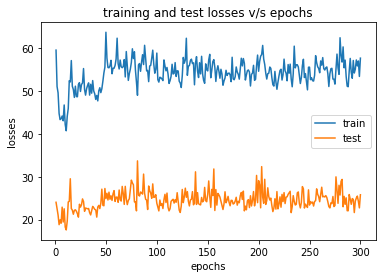

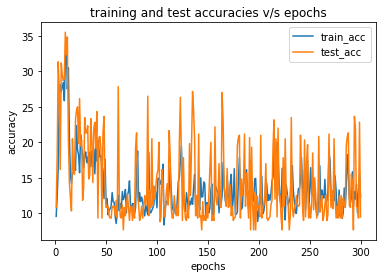

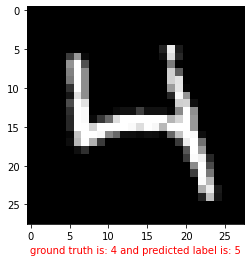

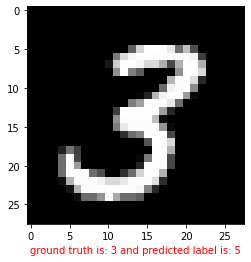

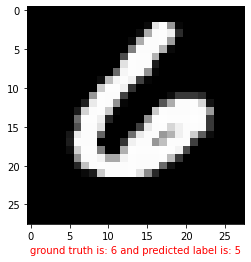

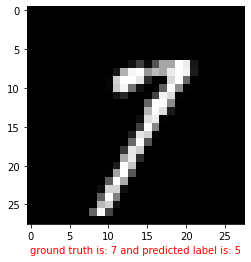

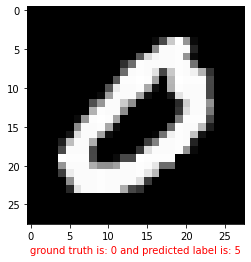

time taken:-  81.222815990448  sec


In [21]:
m2_1.draw_graphs()
m2_1.print_first_five_preds(test_dataloader)
print("time taken:- ",m2_1.time_took()," sec")

In [22]:
m2_2 = model2.Model(10**-3,10**-4,300)
m2_2.compute(train_dataloader,test_dataloader)


epoch: 1/300,train_loss = 45.1953, test_loss = 17.3401 , train_acc = 40.50,test_acc = 53.00
epoch: 2/300,train_loss = 31.0853, test_loss = 11.4247 , train_acc = 69.29,test_acc = 78.67
epoch: 3/300,train_loss = 20.4369, test_loss = 8.1274 , train_acc = 82.43,test_acc = 84.17
epoch: 4/300,train_loss = 14.6670, test_loss = 6.3085 , train_acc = 88.14,test_acc = 85.17
epoch: 5/300,train_loss = 11.3273, test_loss = 5.3594 , train_acc = 90.50,test_acc = 88.00
epoch: 6/300,train_loss = 9.3177, test_loss = 4.6297 , train_acc = 92.00,test_acc = 87.67
epoch: 7/300,train_loss = 8.0290, test_loss = 4.2699 , train_acc = 92.29,test_acc = 88.17
epoch: 8/300,train_loss = 7.3276, test_loss = 4.4019 , train_acc = 93.21,test_acc = 87.50
epoch: 9/300,train_loss = 6.7285, test_loss = 4.1401 , train_acc = 93.50,test_acc = 89.00
epoch: 10/300,train_loss = 6.2464, test_loss = 4.0409 , train_acc = 94.00,test_acc = 88.83
epoch: 11/300,train_loss = 5.8898, test_loss = 3.8660 , train_acc = 93.93,test_acc = 88.50
e

In [23]:
m2_2.test(test_dataloader)
m2_2.print_model_congiurations()

accuracy=87.66666666666667
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         314,000
           Sigmoid-2                  [-1, 400]               0
            Linear-3                  [-1, 200]          80,200
           Sigmoid-4                  [-1, 200]               0
            Linear-5                   [-1, 10]           2,010
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.51
Estimated Total Size (MB): 1.52
----------------------------------------------------------------


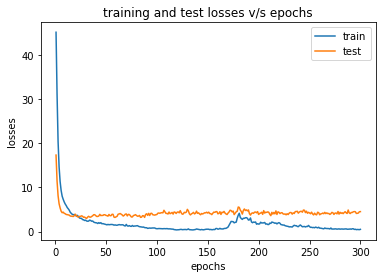

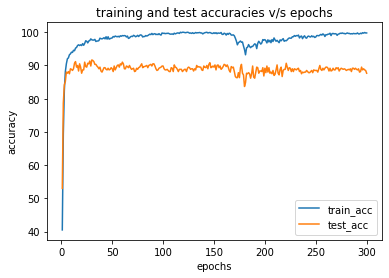

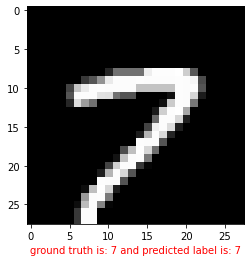

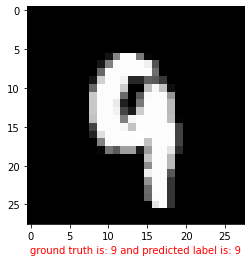

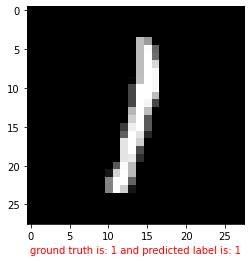

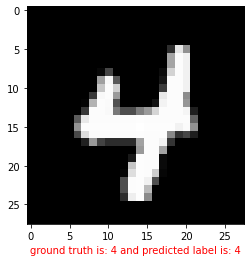

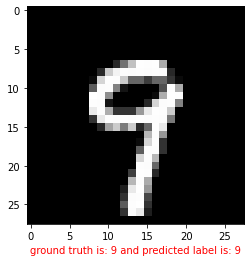

time taken:-  102.05301427841187  sec


In [24]:
m2_2.draw_graphs()
m2_2.print_first_five_preds(test_dataloader)
print("time taken:- ",m2_2.time_took()," sec")

In [25]:
m2_3 = model2.Model(10**-4,10**-5,300)
m2_3.compute(train_dataloader,test_dataloader)


epoch: 1/300,train_loss = 50.2060, test_loss = 22.3142 , train_acc = 13.36,test_acc = 31.83
epoch: 2/300,train_loss = 48.0793, test_loss = 21.4845 , train_acc = 53.00,test_acc = 56.50
epoch: 3/300,train_loss = 46.1814, test_loss = 20.6705 , train_acc = 65.64,test_acc = 62.33
epoch: 4/300,train_loss = 44.1729, test_loss = 19.7355 , train_acc = 66.07,test_acc = 64.83
epoch: 5/300,train_loss = 41.9414, test_loss = 18.7447 , train_acc = 70.36,test_acc = 68.83
epoch: 6/300,train_loss = 39.6337, test_loss = 17.7880 , train_acc = 73.36,test_acc = 70.17
epoch: 7/300,train_loss = 37.3361, test_loss = 16.8729 , train_acc = 74.71,test_acc = 71.83
epoch: 8/300,train_loss = 35.0880, test_loss = 15.8792 , train_acc = 78.21,test_acc = 74.50
epoch: 9/300,train_loss = 32.8942, test_loss = 15.0057 , train_acc = 80.21,test_acc = 75.00
epoch: 10/300,train_loss = 30.8130, test_loss = 14.1719 , train_acc = 81.71,test_acc = 76.33
epoch: 11/300,train_loss = 28.8546, test_loss = 13.5157 , train_acc = 83.29,tes

In [26]:
m2_3.test(test_dataloader)
m2_3.print_model_congiurations()

accuracy=89.16666666666667
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         314,000
           Sigmoid-2                  [-1, 400]               0
            Linear-3                  [-1, 200]          80,200
           Sigmoid-4                  [-1, 200]               0
            Linear-5                   [-1, 10]           2,010
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.51
Estimated Total Size (MB): 1.52
----------------------------------------------------------------


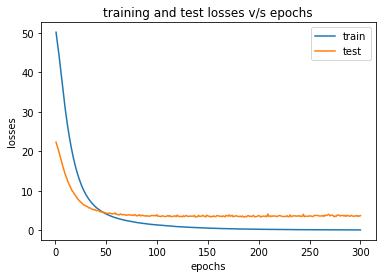

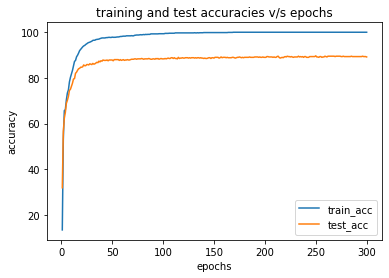

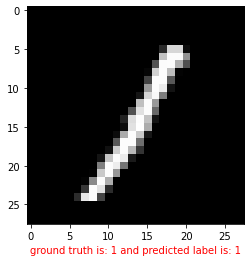

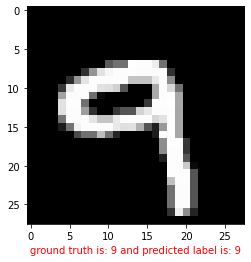

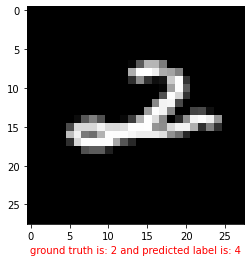

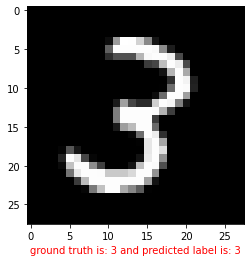

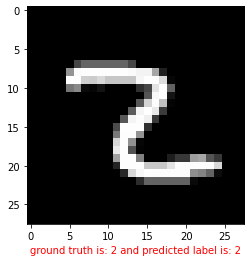

time taken:-  83.72505116462708  sec


In [27]:
m2_3.draw_graphs()
m2_3.print_first_five_preds(test_dataloader)
print("time taken:- ",m2_3.time_took()," sec")

In [28]:
m3_1 = model3.Model(5*10**-2,10**-3,300)
m3_1.compute(train_dataloader,test_dataloader)


epoch: 1/300,train_loss = 23509.6703, test_loss = 92.0630 , train_acc = 14.07,test_acc = 11.50
epoch: 2/300,train_loss = 216.9632, test_loss = 27.8682 , train_acc = 13.21,test_acc = 11.17
epoch: 3/300,train_loss = 62.7241, test_loss = 23.5594 , train_acc = 13.00,test_acc = 12.33
epoch: 4/300,train_loss = 69.0762, test_loss = 22.5969 , train_acc = 12.86,test_acc = 13.50
epoch: 5/300,train_loss = 53.1261, test_loss = 22.9346 , train_acc = 12.07,test_acc = 11.67
epoch: 6/300,train_loss = 50.6751, test_loss = 22.8958 , train_acc = 10.79,test_acc = 11.67
epoch: 7/300,train_loss = 50.6782, test_loss = 23.0192 , train_acc = 11.07,test_acc = 11.17
epoch: 8/300,train_loss = 50.6905, test_loss = 23.0378 , train_acc = 10.57,test_acc = 11.00
epoch: 9/300,train_loss = 54.3074, test_loss = 23.1341 , train_acc = 10.21,test_acc = 11.17
epoch: 10/300,train_loss = 50.6473, test_loss = 22.9868 , train_acc = 11.36,test_acc = 11.00
epoch: 11/300,train_loss = 50.7167, test_loss = 23.0264 , train_acc = 10.79

In [29]:
m3_1.test(test_dataloader)
m3_1.print_model_congiurations()

accuracy=10.833333333333334
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         314,000
              ReLU-2                  [-1, 400]               0
            Linear-3                  [-1, 200]          80,200
              ReLU-4                  [-1, 200]               0
            Linear-5                   [-1, 10]           2,010
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.51
Estimated Total Size (MB): 1.52
----------------------------------------------------------------


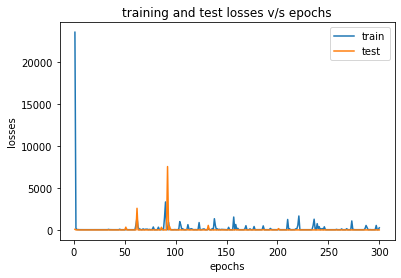

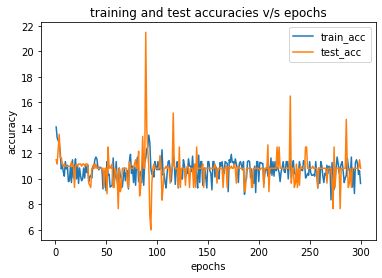

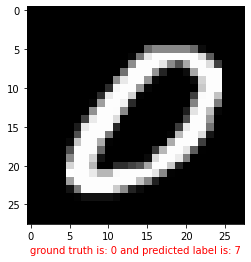

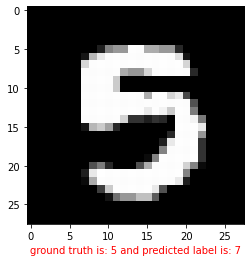

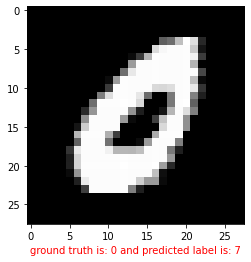

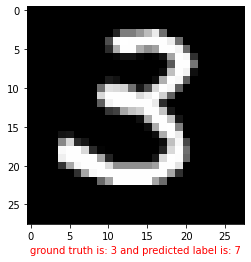

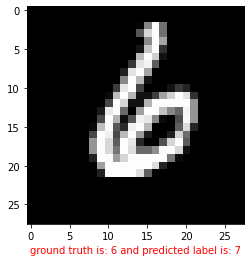

time taken:-  91.67758107185364  sec


In [30]:
m3_1.draw_graphs()
m3_1.print_first_five_preds(test_dataloader)
print("time taken:- ",m3_1.time_took()," sec")

In [31]:
m3_2 = model3.Model(10**-3,10**-4,300)
m3_2.compute(train_dataloader,test_dataloader)


epoch: 1/300,train_loss = 61.2863, test_loss = 8.9066 , train_acc = 65.79,test_acc = 80.67
epoch: 2/300,train_loss = 7.3094, test_loss = 5.7911 , train_acc = 90.29,test_acc = 85.33
epoch: 3/300,train_loss = 2.3499, test_loss = 4.1207 , train_acc = 96.43,test_acc = 89.83
epoch: 4/300,train_loss = 0.6693, test_loss = 5.2468 , train_acc = 99.00,test_acc = 88.67
epoch: 5/300,train_loss = 0.4936, test_loss = 4.0183 , train_acc = 99.79,test_acc = 90.50
epoch: 6/300,train_loss = 0.1754, test_loss = 4.4722 , train_acc = 99.86,test_acc = 89.50
epoch: 7/300,train_loss = 0.0812, test_loss = 4.1707 , train_acc = 99.93,test_acc = 91.17
epoch: 8/300,train_loss = 0.0364, test_loss = 3.9595 , train_acc = 100.00,test_acc = 90.83
epoch: 9/300,train_loss = 0.0244, test_loss = 4.0246 , train_acc = 100.00,test_acc = 90.67
epoch: 10/300,train_loss = 0.0188, test_loss = 3.8432 , train_acc = 100.00,test_acc = 91.00
epoch: 11/300,train_loss = 0.0152, test_loss = 3.8445 , train_acc = 100.00,test_acc = 91.00
epo

In [32]:
m3_2.test(test_dataloader)
m3_2.print_model_congiurations()

accuracy=92.66666666666666
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         314,000
              ReLU-2                  [-1, 400]               0
            Linear-3                  [-1, 200]          80,200
              ReLU-4                  [-1, 200]               0
            Linear-5                   [-1, 10]           2,010
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.51
Estimated Total Size (MB): 1.52
----------------------------------------------------------------


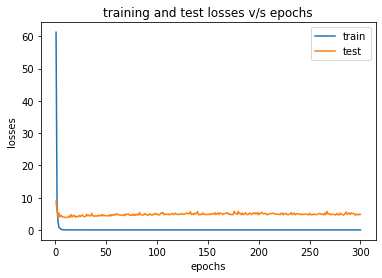

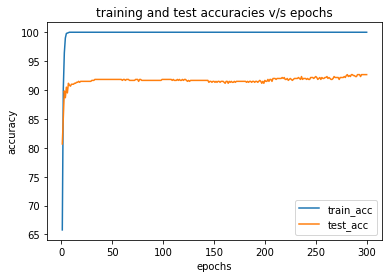

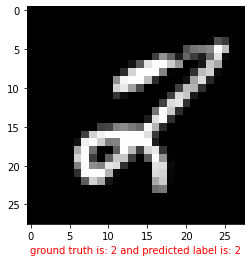

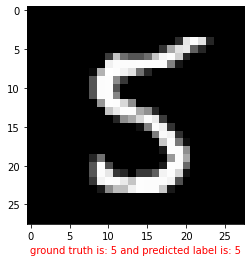

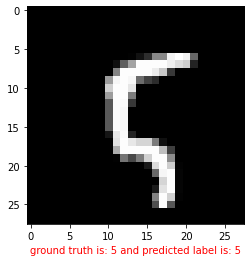

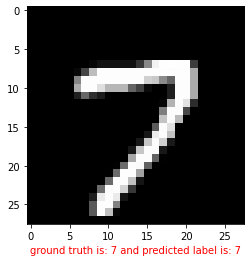

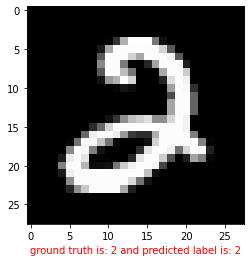

time taken:-  87.35180282592773  sec


In [33]:
m3_2.draw_graphs()
m3_2.print_first_five_preds(test_dataloader)
print("time taken:- ",m3_2.time_took()," sec")

In [34]:
m3_3 = model3.Model(10**-4,10**-5,300)
m3_3.compute(train_dataloader,test_dataloader)


epoch: 1/300,train_loss = 81.6562, test_loss = 13.4669 , train_acc = 44.64,test_acc = 70.83
epoch: 2/300,train_loss = 17.9054, test_loss = 8.4074 , train_acc = 80.57,test_acc = 80.33
epoch: 3/300,train_loss = 7.6299, test_loss = 7.4229 , train_acc = 90.79,test_acc = 82.17
epoch: 4/300,train_loss = 3.5028, test_loss = 6.6289 , train_acc = 96.29,test_acc = 84.17
epoch: 5/300,train_loss = 1.7808, test_loss = 6.1931 , train_acc = 98.36,test_acc = 84.67
epoch: 6/300,train_loss = 0.9442, test_loss = 6.7007 , train_acc = 99.57,test_acc = 86.00
epoch: 7/300,train_loss = 0.5646, test_loss = 6.4173 , train_acc = 99.86,test_acc = 85.33
epoch: 8/300,train_loss = 0.3468, test_loss = 6.2638 , train_acc = 100.00,test_acc = 85.83
epoch: 9/300,train_loss = 0.2745, test_loss = 6.0924 , train_acc = 100.00,test_acc = 87.00
epoch: 10/300,train_loss = 0.2268, test_loss = 6.6132 , train_acc = 100.00,test_acc = 87.17
epoch: 11/300,train_loss = 0.1921, test_loss = 7.2787 , train_acc = 100.00,test_acc = 87.33
e

In [35]:
m3_3.test(test_dataloader)
m3_3.print_model_congiurations()

accuracy=89.83333333333333
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         314,000
              ReLU-2                  [-1, 400]               0
            Linear-3                  [-1, 200]          80,200
              ReLU-4                  [-1, 200]               0
            Linear-5                   [-1, 10]           2,010
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.51
Estimated Total Size (MB): 1.52
----------------------------------------------------------------


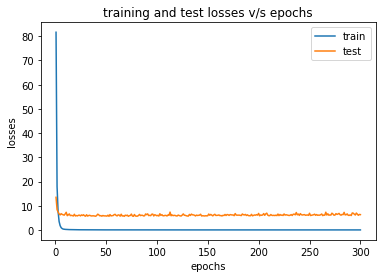

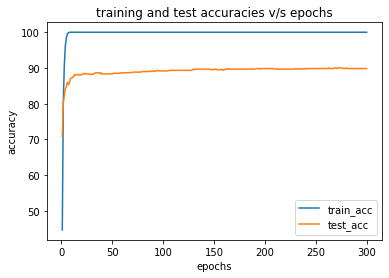

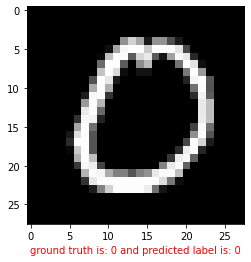

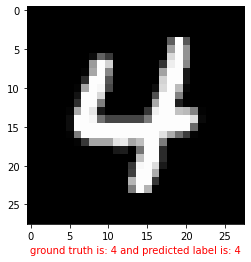

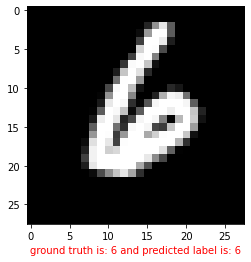

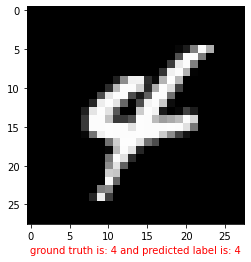

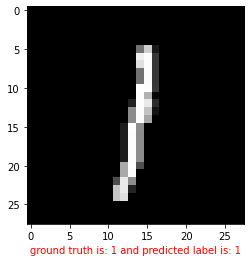

time taken:-  78.3971643447876  sec


In [36]:
m3_3.draw_graphs()
m3_3.print_first_five_preds(test_dataloader)
print("time taken:- ",m3_3.time_took()," sec")

In [37]:
m4_1 = model4.Model(5*10**-2,10**-3,300)
m4_1.compute(train_dataloader,test_dataloader)


epoch: 1/300,train_loss = 32.7443, test_loss = 6.6937 , train_acc = 56.79,test_acc = 78.17
epoch: 2/300,train_loss = 15.4473, test_loss = 5.7062 , train_acc = 77.57,test_acc = 82.17
epoch: 3/300,train_loss = 13.3601, test_loss = 8.2503 , train_acc = 82.50,test_acc = 77.33
epoch: 4/300,train_loss = 13.8353, test_loss = 6.9803 , train_acc = 80.64,test_acc = 81.17
epoch: 5/300,train_loss = 12.2015, test_loss = 7.3182 , train_acc = 82.14,test_acc = 77.50
epoch: 6/300,train_loss = 12.9077, test_loss = 6.8252 , train_acc = 81.07,test_acc = 79.33
epoch: 7/300,train_loss = 13.0686, test_loss = 6.0928 , train_acc = 80.57,test_acc = 81.67
epoch: 8/300,train_loss = 11.5468, test_loss = 5.8114 , train_acc = 83.00,test_acc = 81.17
epoch: 9/300,train_loss = 11.2748, test_loss = 6.7986 , train_acc = 83.79,test_acc = 79.67
epoch: 10/300,train_loss = 11.6182, test_loss = 5.4885 , train_acc = 82.07,test_acc = 82.00
epoch: 11/300,train_loss = 10.6934, test_loss = 7.6867 , train_acc = 83.43,test_acc = 75.

In [38]:
m4_1.test(test_dataloader)
m4_1.print_model_congiurations()

accuracy=77.0
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         314,000
       BatchNorm1d-2                  [-1, 400]             800
           Dropout-3                  [-1, 400]               0
              ReLU-4                  [-1, 400]               0
            Linear-5                  [-1, 200]          80,200
           Sigmoid-6                  [-1, 200]               0
            Linear-7                   [-1, 10]           2,010
Total params: 397,010
Trainable params: 397,010
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 1.51
Estimated Total Size (MB): 1.53
----------------------------------------------------------------


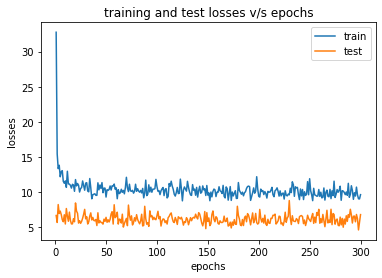

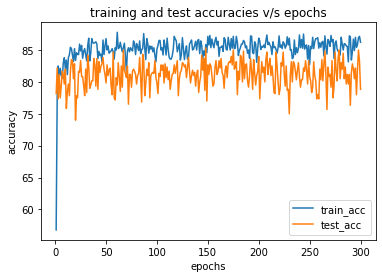

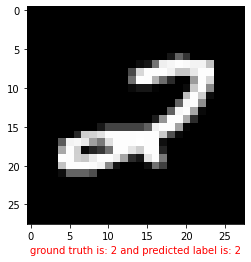

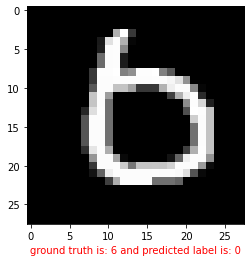

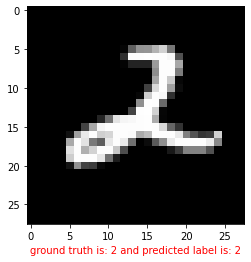

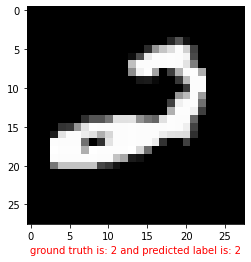

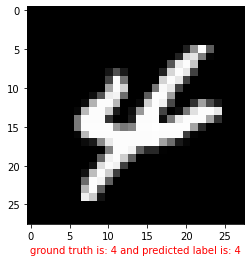

time taken:-  162.7830846309662  sec


In [39]:
m4_1.draw_graphs()
m4_1.print_first_five_preds(test_dataloader)
print("time taken:- ",m4_1.time_took()," sec")

In [40]:
m4_2 = model4.Model(10**-3,10**-4,300)
m4_2.compute(train_dataloader,test_dataloader)


epoch: 1/300,train_loss = 37.1641, test_loss = 11.4989 , train_acc = 58.79,test_acc = 78.67
epoch: 2/300,train_loss = 18.3560, test_loss = 6.5337 , train_acc = 85.00,test_acc = 85.83
epoch: 3/300,train_loss = 10.5659, test_loss = 4.6610 , train_acc = 90.79,test_acc = 89.17
epoch: 4/300,train_loss = 6.9541, test_loss = 4.0521 , train_acc = 93.64,test_acc = 90.33
epoch: 5/300,train_loss = 5.1291, test_loss = 3.8244 , train_acc = 96.21,test_acc = 88.33
epoch: 6/300,train_loss = 3.7711, test_loss = 3.4744 , train_acc = 97.14,test_acc = 88.17
epoch: 7/300,train_loss = 2.8048, test_loss = 3.5487 , train_acc = 98.36,test_acc = 89.33
epoch: 8/300,train_loss = 2.1157, test_loss = 3.4960 , train_acc = 98.71,test_acc = 89.17
epoch: 9/300,train_loss = 1.6575, test_loss = 3.6540 , train_acc = 99.29,test_acc = 89.67
epoch: 10/300,train_loss = 1.4030, test_loss = 3.7336 , train_acc = 99.29,test_acc = 88.83
epoch: 11/300,train_loss = 1.0240, test_loss = 3.7353 , train_acc = 100.00,test_acc = 89.00
epo

In [41]:
m4_2.test(test_dataloader)
m4_2.print_model_congiurations()

accuracy=91.16666666666666
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         314,000
       BatchNorm1d-2                  [-1, 400]             800
           Dropout-3                  [-1, 400]               0
              ReLU-4                  [-1, 400]               0
            Linear-5                  [-1, 200]          80,200
           Sigmoid-6                  [-1, 200]               0
            Linear-7                   [-1, 10]           2,010
Total params: 397,010
Trainable params: 397,010
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 1.51
Estimated Total Size (MB): 1.53
----------------------------------------------------------------


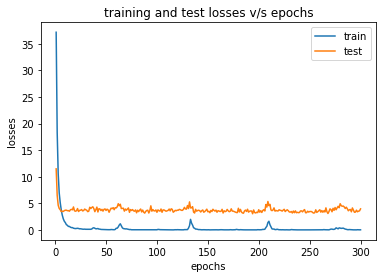

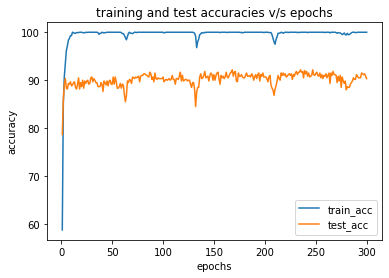

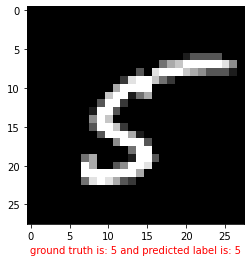

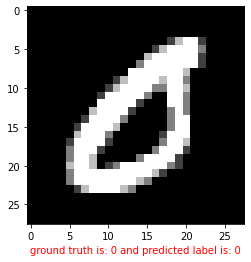

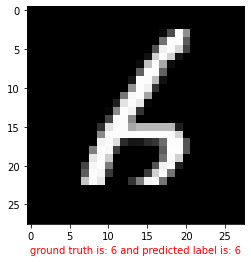

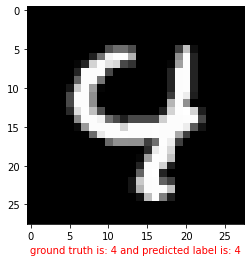

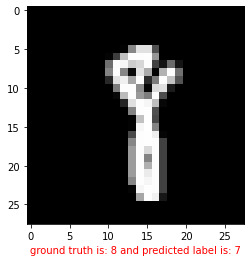

time taken:-  99.09029865264893  sec


In [42]:
m4_2.draw_graphs()
m4_2.print_first_five_preds(test_dataloader)
print("time taken:- ",m4_2.time_took()," sec")

In [43]:
m4_3 = model4.Model(10**-4,10**-5,300)
m4_3.compute(train_dataloader,test_dataloader)


epoch: 1/300,train_loss = 49.2099, test_loss = 21.2319 , train_acc = 21.93,test_acc = 47.33
epoch: 2/300,train_loss = 44.8972, test_loss = 19.5839 , train_acc = 56.29,test_acc = 62.83
epoch: 3/300,train_loss = 41.0333, test_loss = 17.9622 , train_acc = 67.29,test_acc = 67.67
epoch: 4/300,train_loss = 37.4592, test_loss = 16.4010 , train_acc = 72.21,test_acc = 72.83
epoch: 5/300,train_loss = 34.0981, test_loss = 15.0895 , train_acc = 74.64,test_acc = 74.67
epoch: 6/300,train_loss = 31.0899, test_loss = 14.0114 , train_acc = 77.64,test_acc = 75.17
epoch: 7/300,train_loss = 28.4395, test_loss = 12.8530 , train_acc = 79.79,test_acc = 78.17
epoch: 8/300,train_loss = 25.8023, test_loss = 11.9259 , train_acc = 82.14,test_acc = 79.83
epoch: 9/300,train_loss = 23.9310, test_loss = 10.9321 , train_acc = 84.29,test_acc = 81.50
epoch: 10/300,train_loss = 21.6536, test_loss = 10.1714 , train_acc = 86.07,test_acc = 82.33
epoch: 11/300,train_loss = 19.9189, test_loss = 9.3714 , train_acc = 87.07,test

In [44]:
m4_3.test(test_dataloader)
m4_3.print_model_congiurations()

accuracy=87.16666666666667
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         314,000
       BatchNorm1d-2                  [-1, 400]             800
           Dropout-3                  [-1, 400]               0
              ReLU-4                  [-1, 400]               0
            Linear-5                  [-1, 200]          80,200
           Sigmoid-6                  [-1, 200]               0
            Linear-7                   [-1, 10]           2,010
Total params: 397,010
Trainable params: 397,010
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 1.51
Estimated Total Size (MB): 1.53
----------------------------------------------------------------


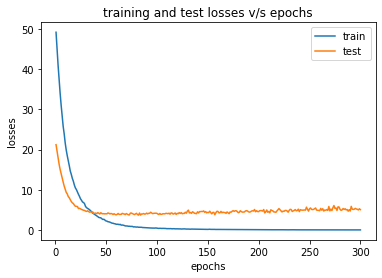

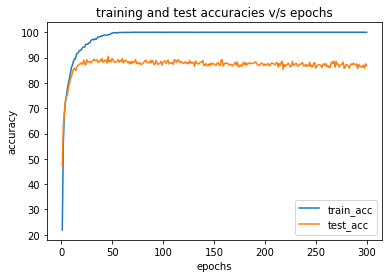

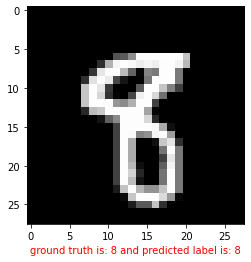

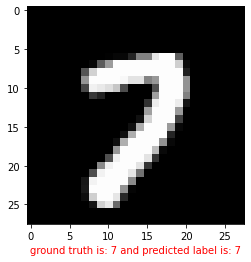

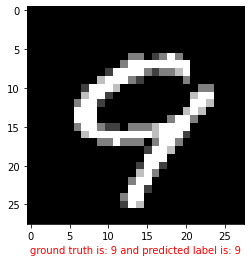

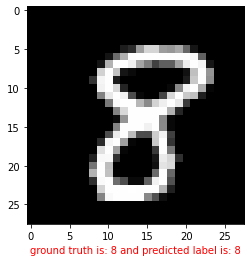

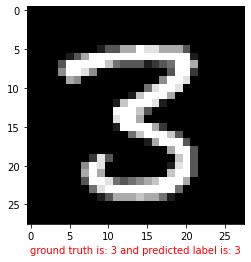

time taken:-  97.68768572807312  sec


In [45]:
m4_3.draw_graphs()
m4_3.print_first_five_preds(test_dataloader)
print("time taken:- ",m4_3.time_took()," sec")

### 12 done, now we will look for model 2 with configuration 2 with mini batches 256 and 512

In [46]:
# created dataloader such that now the size of batche is 256
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
train_dataset = TensorDataset(torch.tensor(X_train),torch.tensor(y_train,dtype=torch.long))
test_dataset  = TensorDataset(torch.tensor(X_test),torch.tensor(y_test,dtype=torch.long))
train_dataloader_256 = DataLoader(train_dataset,batch_size=256,shuffle=True)
test_dataloader_256 = DataLoader(test_dataset,batch_size=256,shuffle=True)


In [47]:
m2_2_256 = model2.Model(10**-3,10**-4,300)
m2_2_256.compute(train_dataloader_256,test_dataloader_256)

epoch: 1/300,train_loss = 13.2951, test_loss = 6.1936 , train_acc = 28.86,test_acc = 58.00
epoch: 2/300,train_loss = 11.7227, test_loss = 5.3872 , train_acc = 63.14,test_acc = 69.17
epoch: 3/300,train_loss = 10.0491, test_loss = 4.5842 , train_acc = 72.57,test_acc = 75.83
epoch: 4/300,train_loss = 8.4772, test_loss = 3.9495 , train_acc = 77.71,test_acc = 78.17
epoch: 5/300,train_loss = 7.0710, test_loss = 3.2770 , train_acc = 82.29,test_acc = 82.33
epoch: 6/300,train_loss = 5.8175, test_loss = 2.8024 , train_acc = 86.00,test_acc = 84.00
epoch: 7/300,train_loss = 4.7770, test_loss = 2.3647 , train_acc = 88.79,test_acc = 85.50
epoch: 8/300,train_loss = 4.0105, test_loss = 1.9810 , train_acc = 90.07,test_acc = 85.83
epoch: 9/300,train_loss = 3.3290, test_loss = 1.8119 , train_acc = 91.14,test_acc = 86.50
epoch: 10/300,train_loss = 2.8051, test_loss = 1.6617 , train_acc = 92.21,test_acc = 87.50
epoch: 11/300,train_loss = 2.4044, test_loss = 1.4482 , train_acc = 92.79,test_acc = 87.17
epoch

In [48]:
m2_2_256.test(test_dataloader_256)
m2_2_256.print_model_congiurations()

accuracy=90.0
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         314,000
           Sigmoid-2                  [-1, 400]               0
            Linear-3                  [-1, 200]          80,200
           Sigmoid-4                  [-1, 200]               0
            Linear-5                   [-1, 10]           2,010
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.51
Estimated Total Size (MB): 1.52
----------------------------------------------------------------


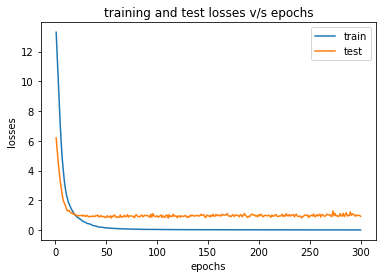

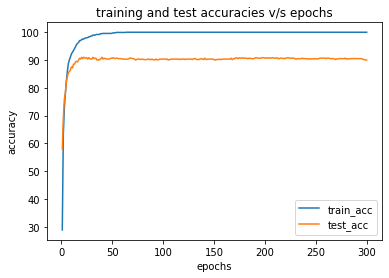

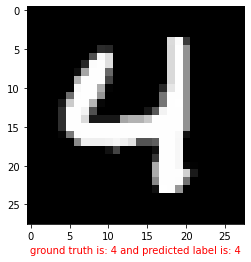

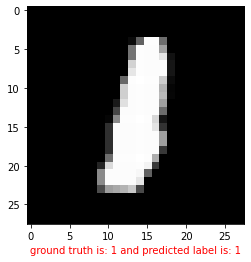

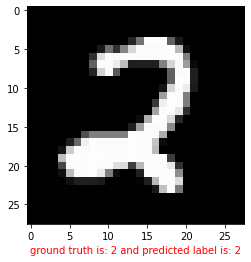

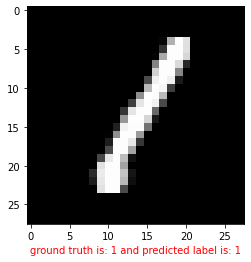

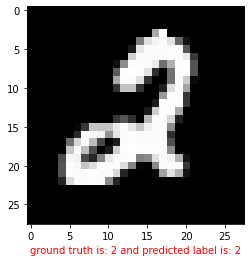

time taken:-  38.76503539085388  sec


In [49]:
m2_2_256.draw_graphs()
m2_2_256.print_first_five_preds(test_dataloader)
print("time taken:- ",m2_2_256.time_took()," sec")

In [50]:
# created dataloader such that now the size of batche is 256
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
train_dataset = TensorDataset(torch.tensor(X_train),torch.tensor(y_train,dtype=torch.long))
test_dataset  = TensorDataset(torch.tensor(X_test),torch.tensor(y_test,dtype=torch.long))
train_dataloader_512 = DataLoader(train_dataset,batch_size=512,shuffle=True)
test_dataloader_512 = DataLoader(test_dataset,batch_size=512,shuffle=True)


In [51]:
m2_2_512 = model2.Model(10**-3,10**-4,300)
m2_2_512.compute(train_dataloader_512,test_dataloader_512)

epoch: 1/300,train_loss = 6.7653, test_loss = 4.2917 , train_acc = 15.43,test_acc = 37.17
epoch: 2/300,train_loss = 6.2372, test_loss = 3.9871 , train_acc = 43.86,test_acc = 52.50
epoch: 3/300,train_loss = 5.7355, test_loss = 3.6072 , train_acc = 60.93,test_acc = 65.17
epoch: 4/300,train_loss = 5.2067, test_loss = 3.2885 , train_acc = 68.64,test_acc = 70.33
epoch: 5/300,train_loss = 4.7124, test_loss = 3.0023 , train_acc = 73.29,test_acc = 73.83
epoch: 6/300,train_loss = 4.2341, test_loss = 2.7014 , train_acc = 77.07,test_acc = 75.83
epoch: 7/300,train_loss = 3.7764, test_loss = 2.4750 , train_acc = 79.93,test_acc = 77.50
epoch: 8/300,train_loss = 3.3832, test_loss = 2.1720 , train_acc = 82.64,test_acc = 79.33
epoch: 9/300,train_loss = 2.9940, test_loss = 1.9133 , train_acc = 85.43,test_acc = 81.17
epoch: 10/300,train_loss = 2.6619, test_loss = 1.7683 , train_acc = 87.50,test_acc = 82.67
epoch: 11/300,train_loss = 2.3529, test_loss = 1.6064 , train_acc = 89.71,test_acc = 84.83
epoch: 1

In [52]:
m2_2_512.test(test_dataloader_512)
m2_2_512.print_model_congiurations()

accuracy=90.5
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         314,000
           Sigmoid-2                  [-1, 400]               0
            Linear-3                  [-1, 200]          80,200
           Sigmoid-4                  [-1, 200]               0
            Linear-5                   [-1, 10]           2,010
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.51
Estimated Total Size (MB): 1.52
----------------------------------------------------------------


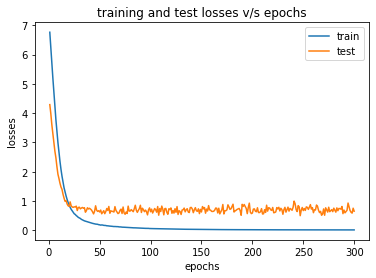

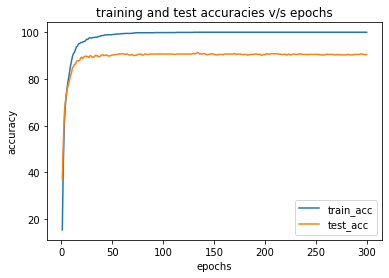

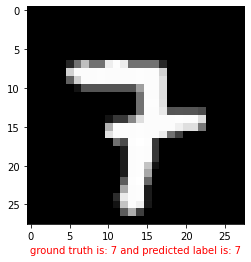

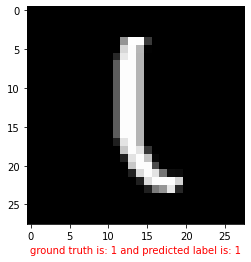

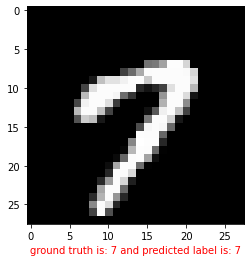

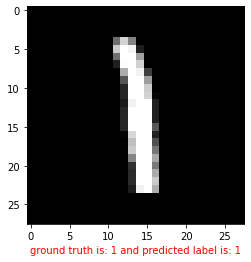

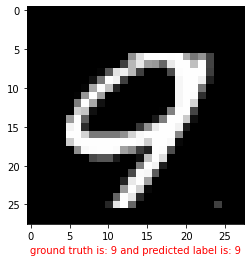

time taken:-  30.736391305923462  sec


In [53]:
m2_2_512.draw_graphs()
m2_2_512.print_first_five_preds(test_dataloader)
print("time taken:- ",m2_2_512.time_took()," sec")

### Obervations

* In the first configuration, the one with high learning rate, results are very nosiy and also the model is not able to learn well.
* For all other training configuration the learning is very good for all models.
* Deep networks perform better than shallow networks.
* Networks with lesser batch size converge faster than the one with larger batchsize.

